In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\16479\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
house = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/kc_house_data.csv')

In [4]:
house.head()

id             date     price  bedrooms  bathrooms  sqft_living   
0  7129300520  20141013T000000  221900.0         3       1.00         1180  \
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement   
0      5650     1.0           0     0  ...      7        1180              0  \
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15   
0      1955             0    98178  47.5112 -122.257           1340  \
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
house.describe()

id         price      bedrooms     bathrooms   sqft_living   
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000  \
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition   
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000  \
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated   
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000  \
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [7]:
house.set_index('id', inplace=True)

In [8]:
house['date'] = house['date'].astype(str)

In [9]:
house['Date_Sold'] = house['date'].str[:8]

In [10]:
house['Date_Sold'] = pd.to_datetime(house['Date_Sold'], format='%Y%m%d')
house

date     price  bedrooms  bathrooms  sqft_living   
id                                                                        
7129300520  20141013T000000  221900.0         3       1.00         1180  \
6414100192  20141209T000000  538000.0         3       2.25         2570   
5631500400  20150225T000000  180000.0         2       1.00          770   
2487200875  20141209T000000  604000.0         4       3.00         1960   
1954400510  20150218T000000  510000.0         3       2.00         1680   
...                     ...       ...       ...        ...          ...   
263000018   20140521T000000  360000.0         3       2.50         1530   
6600060120  20150223T000000  400000.0         4       2.50         2310   
1523300141  20140623T000000  402101.0         2       0.75         1020   
291310100   20150116T000000  400000.0         3       2.50         1600   
1523300157  20141015T000000  325000.0         2       0.75         1020   

            sqft_lot  floors  waterfront  view  condition  ...  sqft_above   
id                                                         ...               
7129300520      5650     1.0           0     0          3  ...        1180  \
6414100192      7242     2.0           0     0          3  ...        2170   
5631500400     10000     1.0           0     0          3  ...         770   
2487200875      5000     1.0           0     0          5  ...        1050   
1954400510      8080     1.0           0     0          3  ...        1680   
...              ...     ...         ...   ...        ...  ...         ...   
263000018       1131     3.0           0     0          3  ...        1530   
6600060120      5813     2.0           0     0          3  ...        2310   
1523300141      1350     2.0           0     0          3  ...        1020   
291310100       2388     2.0           0     0          3  ...        1600   
1523300157      1076     2.0           0     0          3  ...        1020   

            sqft_basement  yr_built  yr_renovated  zipcode      lat     long   
id                                                                             
7129300520              0      1955             0    98178  47.5112 -122.257  \
6414100192            400      1951          1991    98125  47.7210 -122.319   
5631500400              0      1933             0    98028  47.7379 -122.233   
2487200875            910      1965             0    98136  47.5208 -122.393   
1954400510              0      1987             0    98074  47.6168 -122.045   
...                   ...       ...           ...      ...      ...      ...   
263000018               0      2009             0    98103  47.6993 -122.346   
6600060120              0      2014             0    98146  47.5107 -122.362   
1523300141              0      2009             0    98144  47.5944 -122.299   
291310100               0      2004             0    98027  47.5345 -122.069   
1523300157              0      2008             0    98144  47.5941 -122.299   

            sqft_living15  sqft_lot15  Date_Sold  
id                                                
7129300520           1340        5650 2014-10-13  
6414100192           1690        7639 2014-12-09  
5631500400           2720        8062 2015-02-25  
2487200875           1360        5000 2014-12-09  
1954400510           1800        7503 2015-02-18  
...                   ...         ...        ...  
263000018            1530        1509 2014-05-21  
6600060120           1830        7200 2015-02-23  
1523300141           1020        2007 2014-06-23  
291310100            1410        1287 2015-01-16  
1523300157           1020        1357 2014-10-15  

[21613 rows x 21 columns]

In [11]:
import datetime

current_year = datetime.datetime.now().year
house['Age_of_House'] = current_year - house['yr_built']

In [12]:
house['Price_per_Sqft'] = house['price'] / (house['sqft_living'] + house['sqft_lot'])

In [13]:
house['Month_Sold'] = house['Date_Sold'].dt.month

<Axes: ylabel='Price_per_Sqft'>

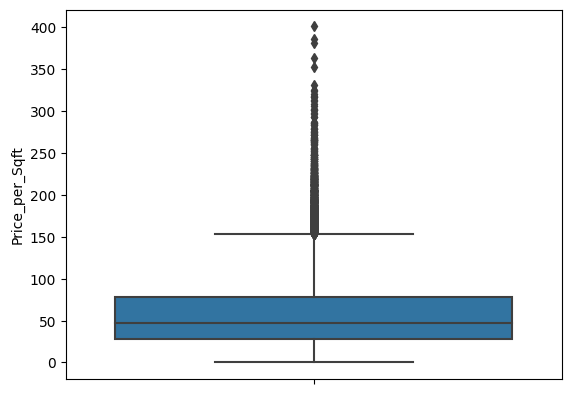

In [14]:
sns.boxplot(data = house, y = 'Price_per_Sqft')

<Axes: ylabel='bedrooms'>

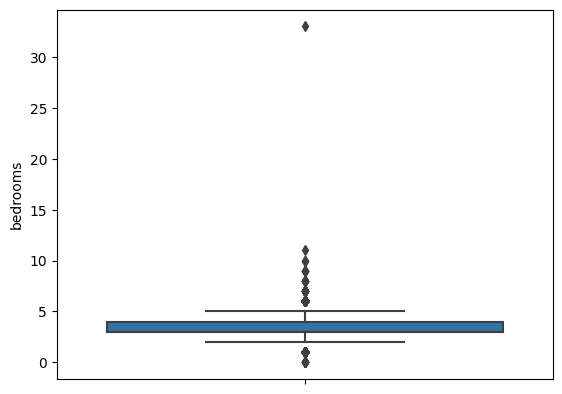

In [15]:
sns.boxplot(data = house, y = 'bedrooms')

<Axes: ylabel='bedrooms'>

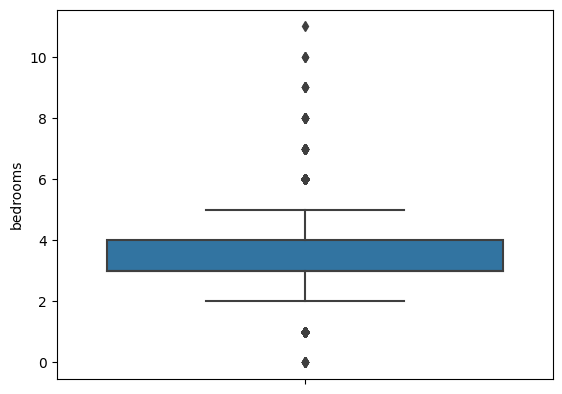

In [16]:
house= house[house['bedrooms'] <= 30]
sns.boxplot(data = house, y = 'bedrooms')


<Axes: ylabel='bedrooms'>

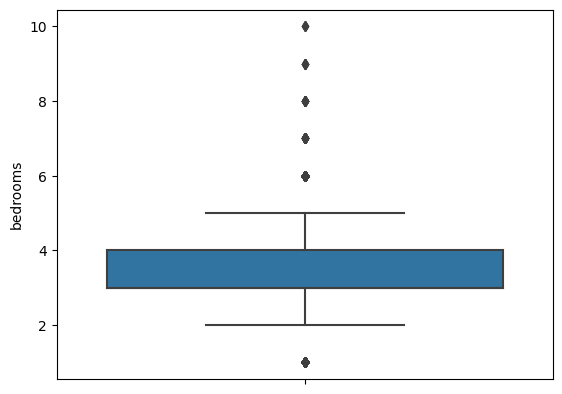

In [17]:
house = house[(house['bedrooms'] <= 10) & (house['bedrooms'] > 0)]
sns.boxplot(data = house, y = 'bedrooms')

In [18]:
house.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot   
count  2.159800e+04  21598.000000  21598.000000  21598.000000  2.159800e+04  \
mean   5.401630e+05      3.371145      2.115508   2080.102371  1.510242e+04   
min    7.500000e+04      1.000000      0.000000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1427.750000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.620000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068875e+04   
max    7.700000e+06     10.000000      8.000000  13540.000000  1.651359e+06   
std    3.671427e+05      0.903013      0.769343    918.212323  4.141211e+04   

             floors    waterfront          view     condition         grade   
count  21598.000000  21598.000000  21598.000000  21598.000000  21598.000000  \
mean       1.494027      0.007547      0.234281      3.409714      7.657515   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   
std        0.539680      0.086547      0.766374      0.650524      1.174020   

       ...  yr_renovated       zipcode           lat          long   
count  ...  21598.000000  21598.000000  21598.000000  21598.000000  \
mean   ...     84.368321  98077.944115     47.560076   -122.213922   
min    ...      0.000000  98001.000000     47.155900   -122.519000   
25%    ...      0.000000  98033.000000     47.471100   -122.328000   
50%    ...      0.000000  98065.000000     47.571800   -122.230000   
75%    ...      0.000000  98118.000000     47.678000   -122.125000   
max    ...   2015.000000  98199.000000     47.777600   -121.315000   
std    ...    401.601697     53.513315      0.138562      0.140777   

       sqft_living15     sqft_lot15                      Date_Sold   
count   21598.000000   21598.000000                          21598  \
mean     1986.578804   12761.168164  2014-10-29 04:38:41.548291328   
min       399.000000     651.000000            2014-05-02 00:00:00   
25%      1490.000000    5100.000000            2014-07-22 00:00:00   
50%      1840.000000    7620.000000            2014-10-16 00:00:00   
75%      2360.000000   10083.750000            2015-02-17 00:00:00   
max      6210.000000  871200.000000            2015-05-27 00:00:00   
std       685.248809   27274.591459                            NaN   

       Age_of_House  Price_per_Sqft    Month_Sold  
count  21598.000000    21598.000000  21598.000000  
mean      51.999028       59.714378      6.574035  
min        8.000000        0.163020      1.000000  
25%       26.000000       28.128755      4.000000  
50%       48.000000       46.857652      6.000000  
75%       72.000000       78.043945      9.000000  
max      123.000000      400.964599     12.000000  
std       29.372670       45.607370      3.115316  

[8 rows x 23 columns]

<Axes: xlabel='Price_per_Sqft', ylabel='Count'>

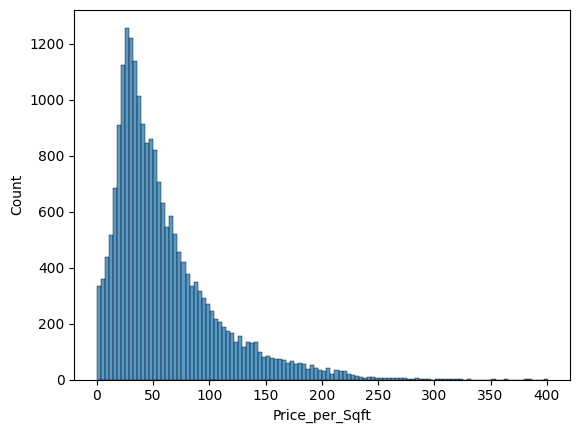

In [19]:
sns.histplot(house['Price_per_Sqft'])

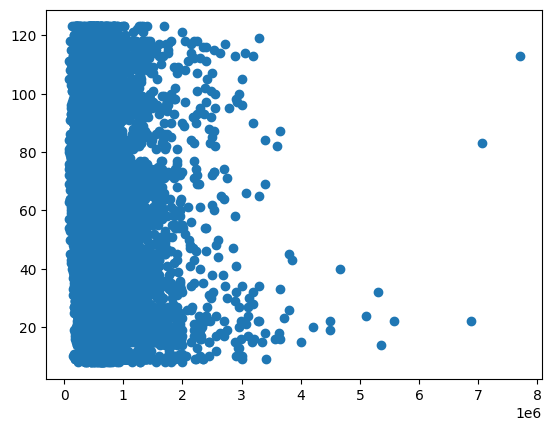

In [20]:
plt.scatter(house['price'],house['Age_of_House'])

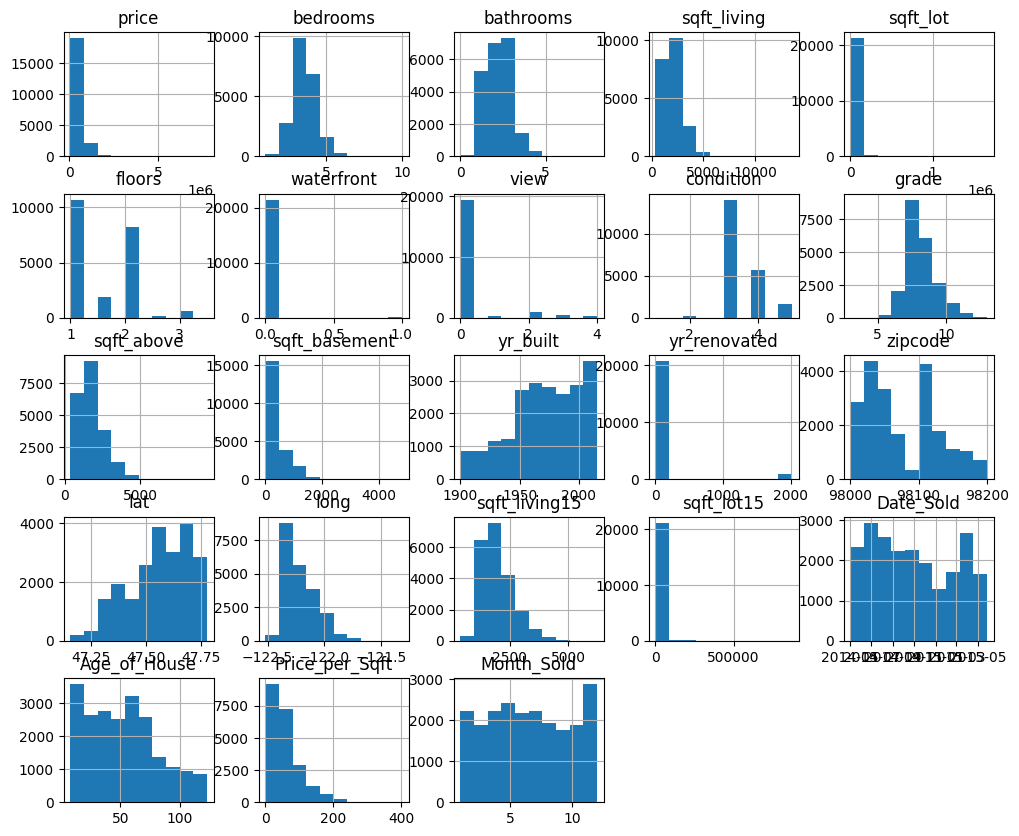

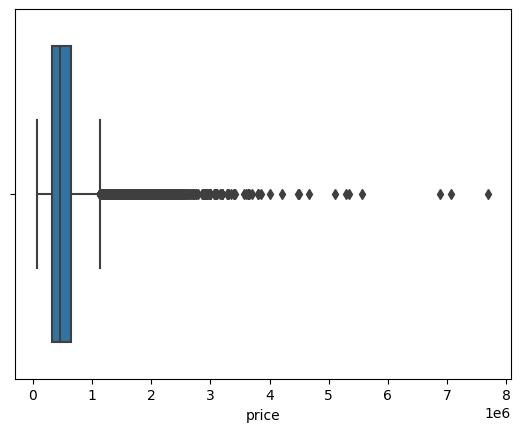

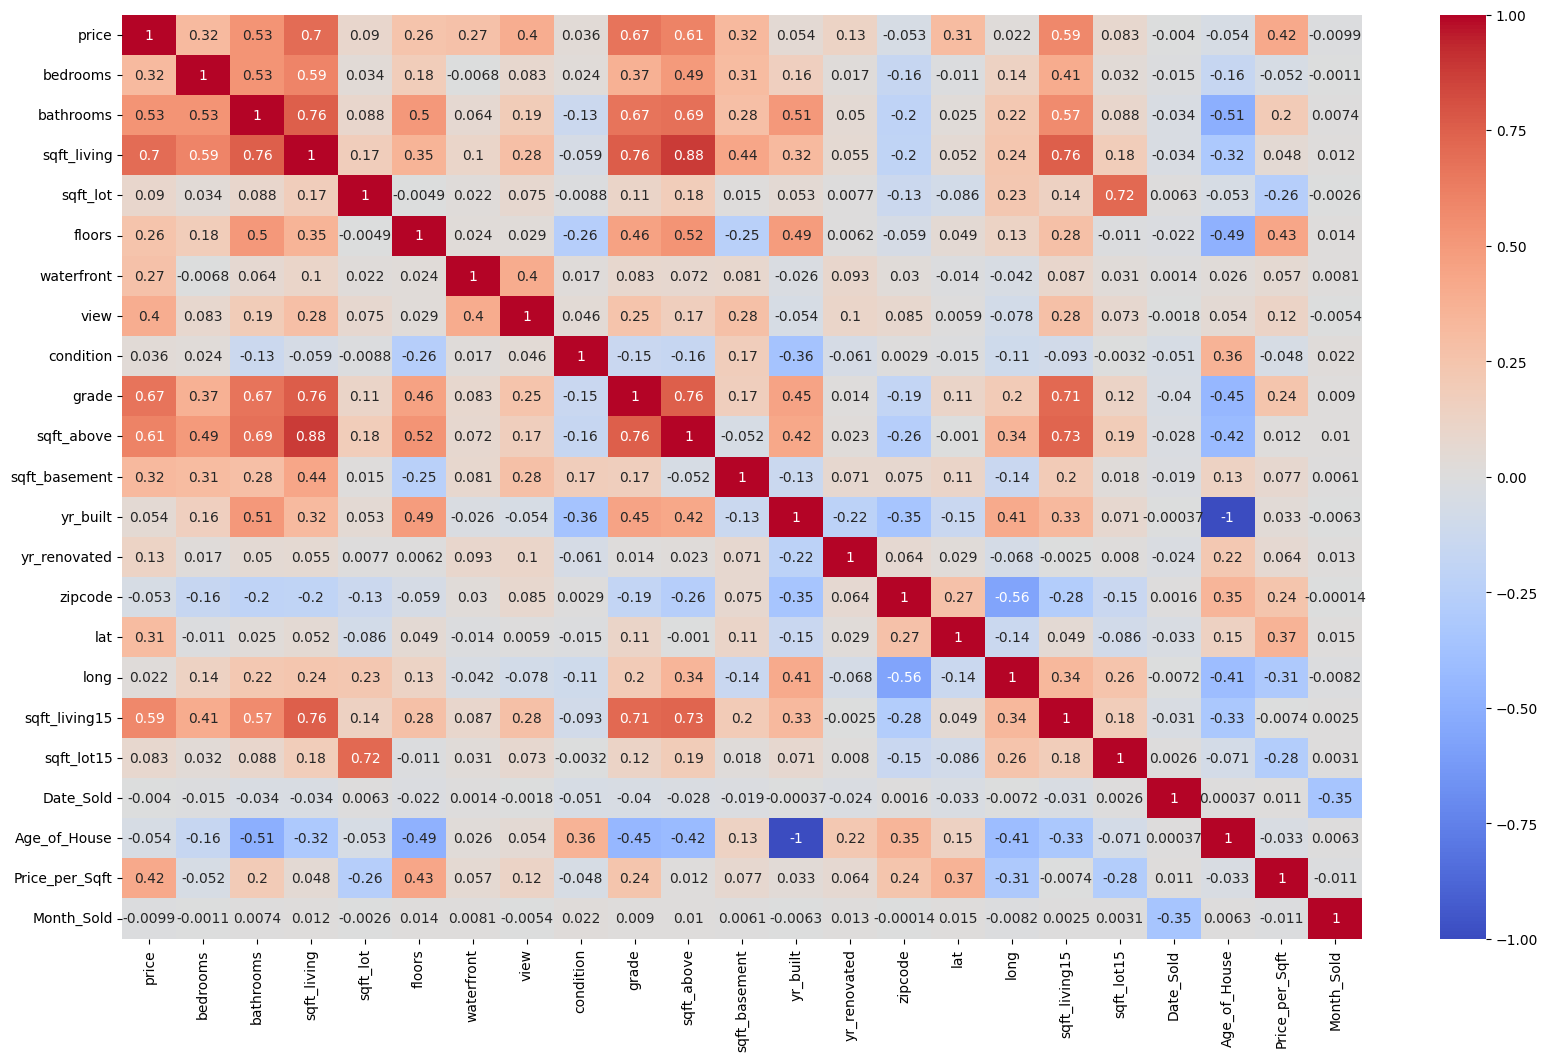

In [21]:
house.hist(figsize=(12, 10)) # we can quickly create all histograms at once 
plt.show()

# Box plot of 'age' variable
sns.boxplot(x='price', data=house)
plt.show()

house1 = house.drop('date', axis=1)

# Calculate the correlation matrix
corr_matrix = house1.corr()
plt.figure(figsize=(20, 12))
# Plot the correlation matrix heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [22]:
results = ols("price ~ sqft_lot + bathrooms + bedrooms", data=house).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     2808.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:56:32   Log-Likelihood:            -3.0384e+05
No. Observations:               21598   AIC:                         6.077e+05
Df Residuals:                   21594   BIC:                         6.077e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.817e+04   8423.064     -4.532      0.0

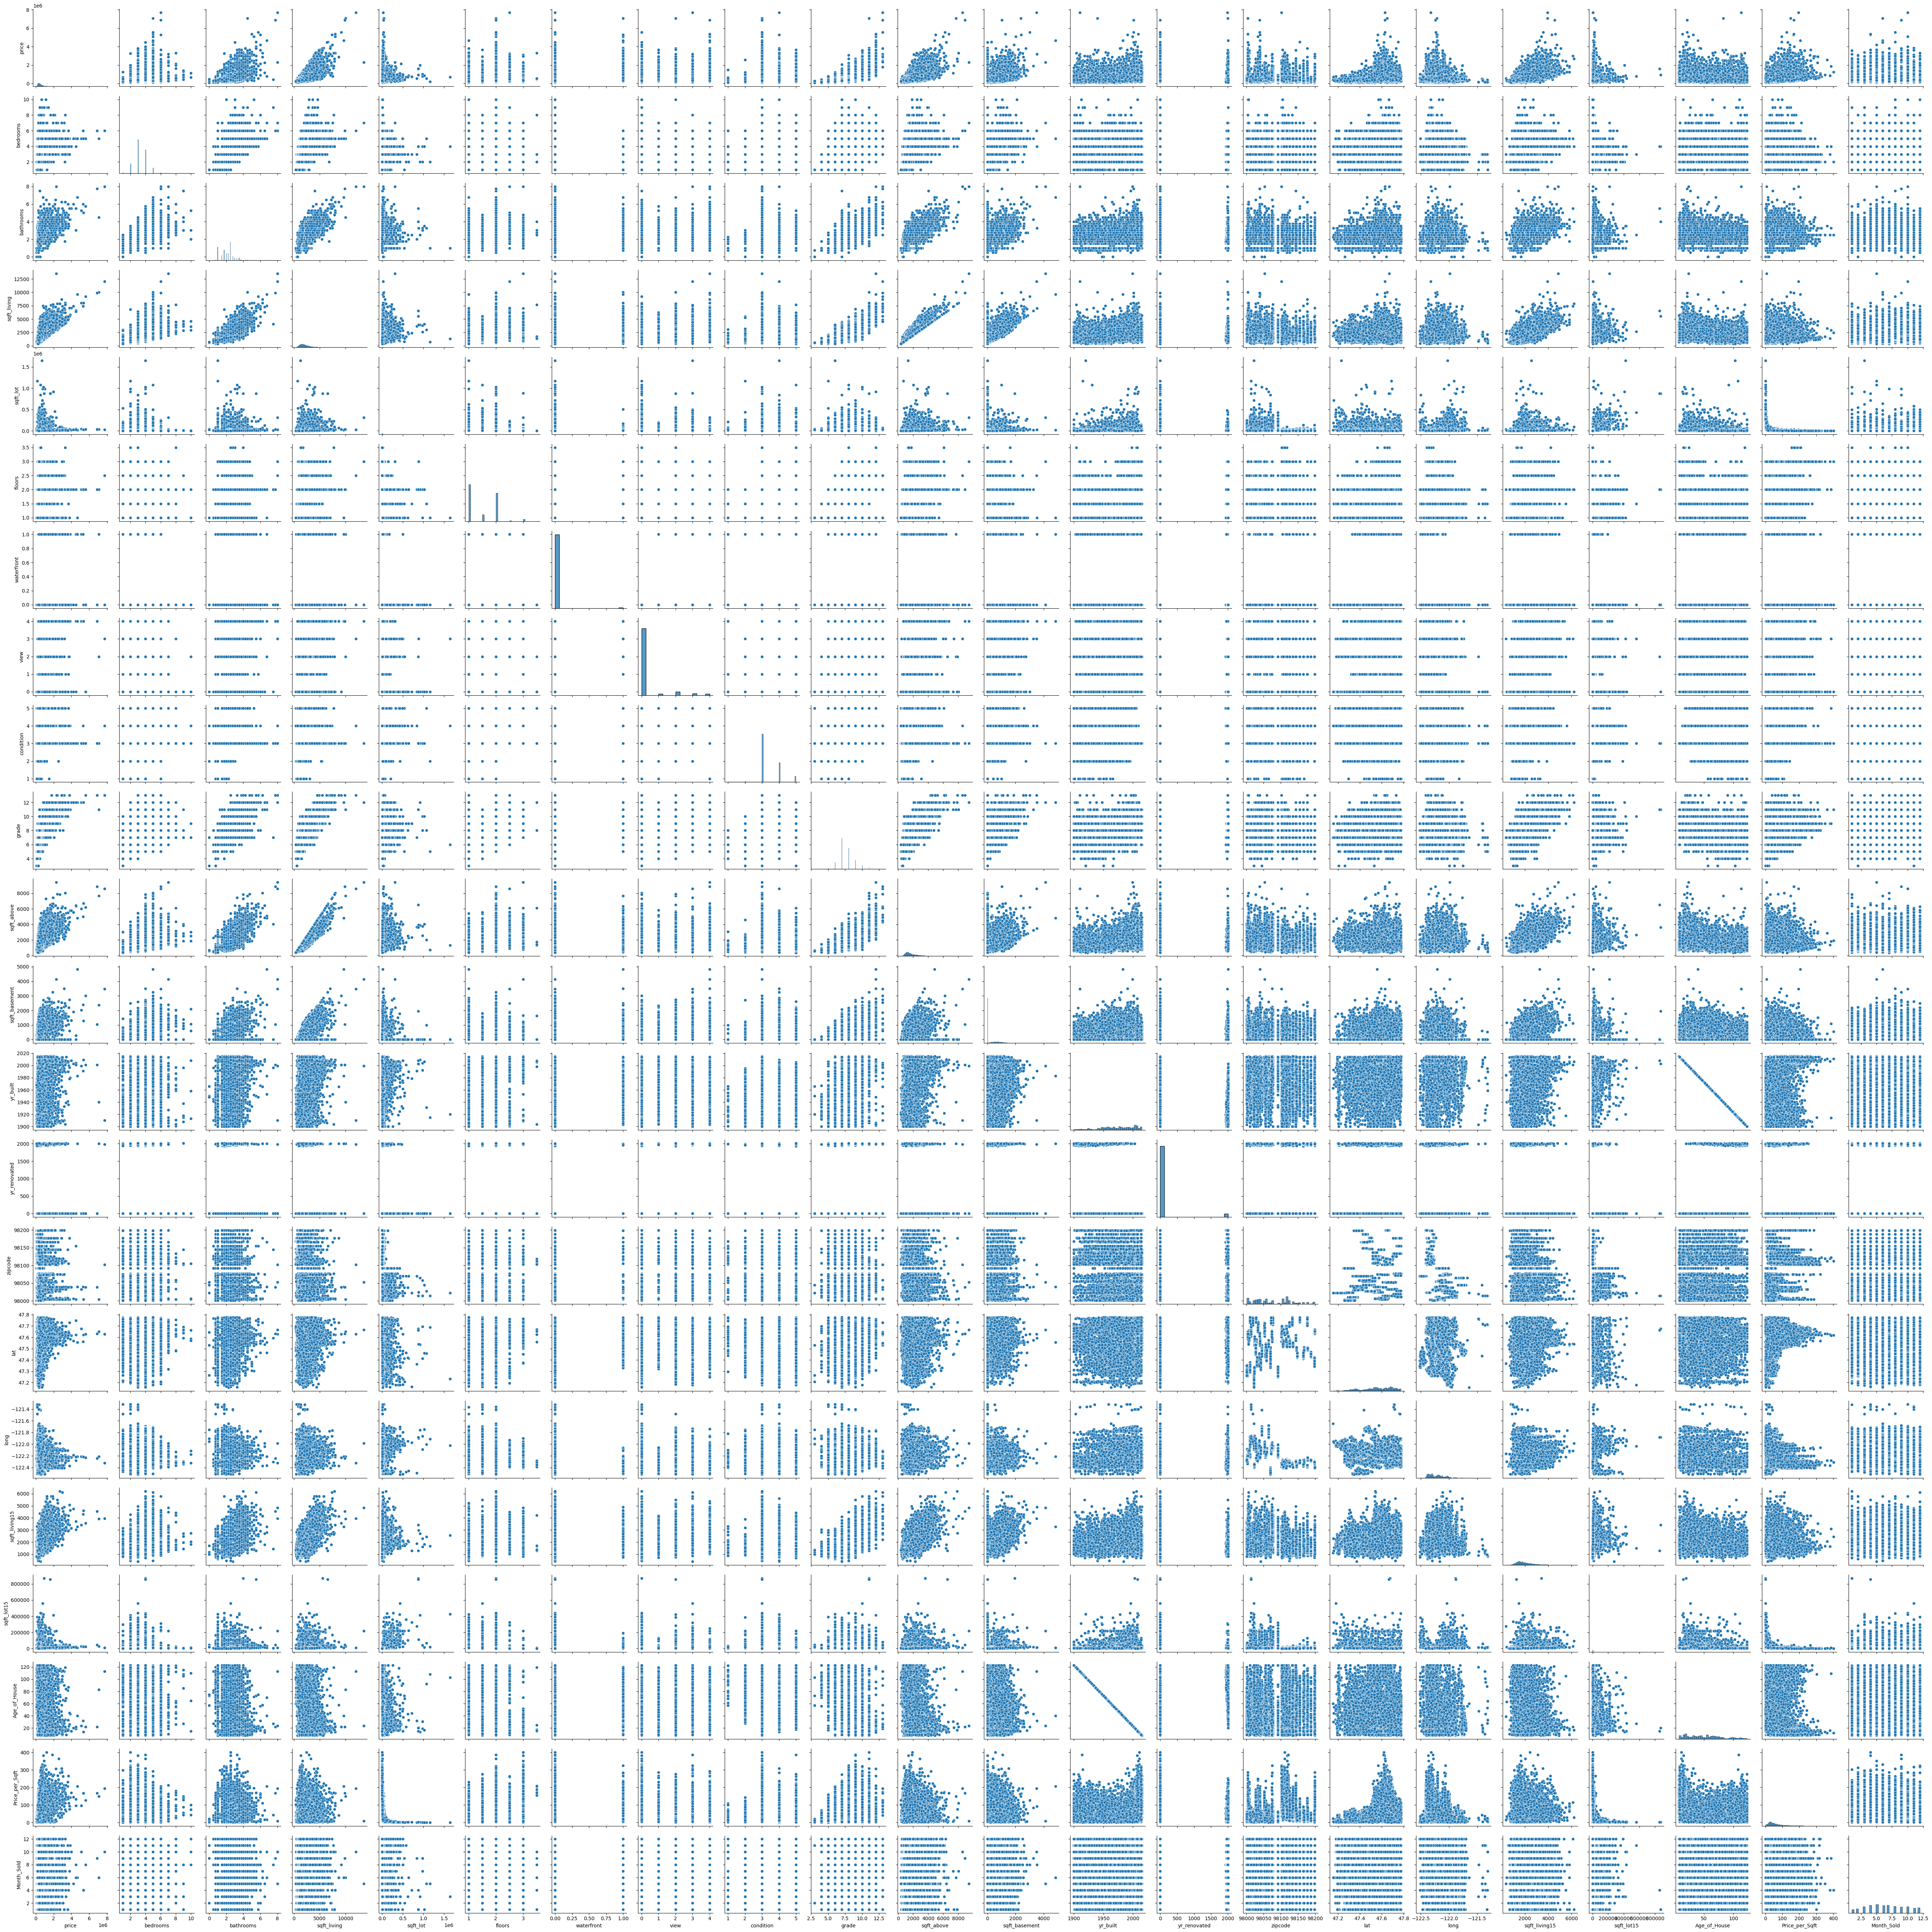

In [23]:
sns.pairplot(house)

In [24]:
season_mapping = {
    1: 1, 2: 1, 3: 1,    # Quarter 1 assigned to Season 1
    4: 2, 5: 2, 6: 2,    # Quarter 2 assigned to Season 2
    7: 3, 8: 3, 9: 3,    # Quarter 3 assigned to Season 3
    10: 4, 11: 4, 12: 4  # Quarter 4 assigned to Season 4
}

# Create the 'Season' feature based on 'Month_Sold'
house['Season'] = house['Month_Sold'].map(season_mapping)

In [25]:
house.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot   
count  2.159800e+04  21598.000000  21598.000000  21598.000000  2.159800e+04  \
mean   5.401630e+05      3.371145      2.115508   2080.102371  1.510242e+04   
min    7.500000e+04      1.000000      0.000000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1427.750000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.620000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068875e+04   
max    7.700000e+06     10.000000      8.000000  13540.000000  1.651359e+06   
std    3.671427e+05      0.903013      0.769343    918.212323  4.141211e+04   

             floors    waterfront          view     condition         grade   
count  21598.000000  21598.000000  21598.000000  21598.000000  21598.000000  \
mean       1.494027      0.007547      0.234281      3.409714      7.657515   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   
std        0.539680      0.086547      0.766374      0.650524      1.174020   

       ...       zipcode           lat          long  sqft_living15   
count  ...  21598.000000  21598.000000  21598.000000   21598.000000  \
mean   ...  98077.944115     47.560076   -122.213922    1986.578804   
min    ...  98001.000000     47.155900   -122.519000     399.000000   
25%    ...  98033.000000     47.471100   -122.328000    1490.000000   
50%    ...  98065.000000     47.571800   -122.230000    1840.000000   
75%    ...  98118.000000     47.678000   -122.125000    2360.000000   
max    ...  98199.000000     47.777600   -121.315000    6210.000000   
std    ...     53.513315      0.138562      0.140777     685.248809   

          sqft_lot15                      Date_Sold  Age_of_House   
count   21598.000000                          21598  21598.000000  \
mean    12761.168164  2014-10-29 04:38:41.548291328     51.999028   
min       651.000000            2014-05-02 00:00:00      8.000000   
25%      5100.000000            2014-07-22 00:00:00     26.000000   
50%      7620.000000            2014-10-16 00:00:00     48.000000   
75%     10083.750000            2015-02-17 00:00:00     72.000000   
max    871200.000000            2015-05-27 00:00:00    123.000000   
std     27274.591459                            NaN     29.372670   

       Price_per_Sqft    Month_Sold        Season  
count    21598.000000  21598.000000  21598.000000  
mean        59.714378      6.574035      2.524678  
min          0.163020      1.000000      1.000000  
25%         28.128755      4.000000      2.000000  
50%         46.857652      6.000000      2.000000  
75%         78.043945      9.000000      3.000000  
max        400.964599     12.000000      4.000000  
std         45.607370      3.115316      1.034219  

[8 rows x 24 columns]

In [26]:
categorical_features = ['waterfront','view', 'condition','grade', 'Season']
numerical_features = ['bedrooms','bathrooms', 'sqft_living', 'sqft_lot','floors','sqft_above','sqft_basement','sqft_living15','sqft_lot15','Age_of_House', 'Price_per_Sqft']
target = 'price'

In [27]:
X_train, X_test, y_train, y_test = train_test_split(house[categorical_features + numerical_features]
                                                    ,house[target],
                                                    test_size = 0.3, random_state=1234)

NameError: name 'train_test_split' is not defined

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer
import numpy as np
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [ ]:

from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [ ]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'Season']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement',
                                                   'sqft_living15',
                                                   'sqft_lot15', 'Age_of_House',
                                                   'Price_per_Sqft'])])),
                ('regressor', LinearRegression())])

In [ ]:
pred = linear_regression.predict(X_test)

In [ ]:
pred

array([452512., 485248., 321600., ..., 674624., 534976., 639904.])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(pred,y_test))

170792.27820101543

In [ ]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [ ]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'Season']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement',
                                                   'sqft_living15',
                                                   'sqft_lot15', 'Age_of_House',
                                                   'Price_per_Sqft'])])),
                ('regressor', Ridge(alpha=3.0))])

In [ ]:
pred_ridge = ridge_regression.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

171778.4225622843

In [ ]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [ ]:
lasso_regression.fit(X_train, y_train)

C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.766e+12, tolerance: 1.983e+11
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'Season']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement',
                                                   'sqft_living15',
                                                   'sqft_lot15', 'Age_of_House',
                                                   'Price_per_Sqft'])])),
                ('regressor', Lasso())])

In [ ]:
lasso_pred = lasso_regression.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

170811.18189979708

In [ ]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [ ]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'Season']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement',
                                                   'sqft_living15',
                                                   'sqft_lot15', 'Age_of_House',
                                                   'Price_per_Sqft'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [ ]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

199089.32394662814

In [ ]:
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
